# "Plotting Electric Potential"


The goal of is project was to find the electric potential $V$ from a function and then visualize the resulting field with 1 or more point charges

The electric potential is given as $V$ and is given by the function:

$$V=k\frac{q}{r}\,,$$

where:
- k is the electrostatic constant $k=8.99\times10^{9}$ V$\cdot$m$\cdot$C$^{-1}$
- q is a point charge (measured in coulombs)
- r is the radius from the point charge (measured in meters)


To start out, a function for the electric potential must be written to work with. V is going to be measured in terms of Volts. 

For this particular project, the imports that are needed are going to be:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random #used for creating random point charges


In [2]:
def potential1D(r, q):
    k = 8.99e9
    V = k*q/r
    
    return V #returns value of electric potential


To begin the process of visualizing our potential, we need to put it in context. The following is a 1-D plot of V as a function of the radius. 

The x-axis represents the distance from the point charge.
The y-axis represents V

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


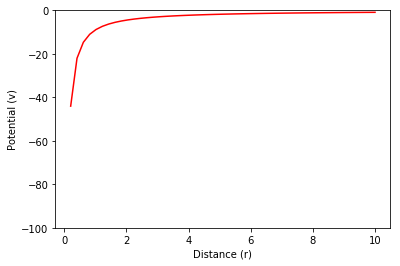

In [3]:
q = -1e-9 #value for the point charge
r = np.linspace(0, 10, 50)

plt.xlabel("Distance (r)")
plt.ylabel("Potential (v)")
plt.ylim(-100, 0) #set limits for the graph
plt.plot(r, potential1D(r, q), "red") 
plt.show()


From the graph, we can see that a increase in distance is connected to the potential increasing to 0. 

Now that we have a function that solves for the potential in 1-D, we can extend this to a 2-D case. The function will involve the distance formula. Important to note that x, y, and q are all scalers. This is due to the fact that the works for a single point charge. 

On the X-Y Plane, the function for potential becomes:

$$V(x,y)=k\frac{q}{\sqrt{(x-x_0)^2+(y-y_0)^2}}\,.$$



In [4]:

def potential2D(x, y, q, x0, y0):
    k = 8.99e9
    Vxy = k*q/(((x-x0)**2)+((y-y0)**2))**(1/2) #distance formula needed in 2-D cases
    return Vxy


As previously done with the 1-D function, we can visualize this with a 2-D plot. Since it is no longer in one dimension, it will be easiest to pass arrays for both x and y. These arrays will therefore return V as an array. 

In [5]:
k = 8.99e9
q = 1e-9

x0, y0 = 0.5, 0.5 #intial point

x = np.linspace(0, 1, 101) #single arrays for both x and y
y = np.linspace(0, 1, 101) 

X, Y = np.meshgrid(x, y) #creates grid of x and y values together
V = k*q/(((X-x0)**2) + ((Y-y0)**2))**(1/2) 

V #will return an array


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


array([[12.71377993, 12.84154685, 12.97054403, ..., 12.97054403,
        12.84154685, 12.71377993],
       [12.84154685, 12.97324482, 13.10629316, ..., 13.10629316,
        12.97324482, 12.84154685],
       [12.97054403, 13.10629316, 13.24352076, ..., 13.24352076,
        13.10629316, 12.97054403],
       ...,
       [12.97054403, 13.10629316, 13.24352076, ..., 13.24352076,
        13.10629316, 12.97054403],
       [12.84154685, 12.97324482, 13.10629316, ..., 13.10629316,
        12.97324482, 12.84154685],
       [12.71377993, 12.84154685, 12.97054403, ..., 12.97054403,
        12.84154685, 12.71377993]])

Now that we have a working 2-D function for V, we can finally get to the fun part. Plotting these images on an imshow map along with contour lines will help to visualize the electric field. 

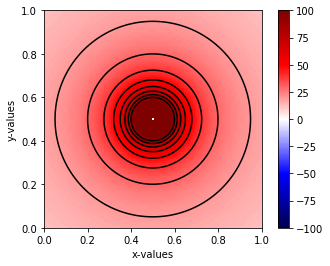

In [6]:
xmin = ymin = 0
xmax = ymax = 1

plt.imshow(V, origin = "lower", cmap = "seismic", vmin = -100, vmax = 100, extent = (xmin, xmax, ymin, ymax))
#imshow creates color on a map according to level of potential
plt.colorbar() 
plt.contour(V, levels = np.arange(0, 100, 10), colors = "black", extent = (xmin, xmax, ymin, ymax))
#contour places lines at every 10 volts
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.show()


Notice how the point charge's potential is zero. This shows that the imshow accurarely portrays the level of Voltage throughout the imshow map. 

The last piece of this project is to plot multiple point charges in the same area and see how the contour lines would be affected by this. 

This requires a function that is going to take in x, y, and q values for all three point charges. For example, q1 would have a location of x1 and y2. This function is generally going to look like the previous one, except with equations for two more V's. 

In [9]:
def V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3):
    
    k = 8.99e9
    x = np.linspace(0, 1, 101)
    y = np.linspace(0, 1, 101)
    X, Y = np.meshgrid(x, y)
    V1 = k*q1/(((X - x1)**2)+((Y - y1)**2))**(1/2)
    V2 = k*q2/(((X - x2)**2)+((Y - y2)**2))**(1/2)
    V3 = k*q3/(((X - x3)**2)+((Y - y3)**2))**(1/2)
    V = V1 + V2 + V3
    
    plt.imshow(V, origin = "lower", cmap = "seismic", vmin = -100, vmax = 100, extent = (xmin, xmax, ymin, ymax))
    plt.colorbar()
    plt.contour(V, levels = np.arange(0, 100, 10), colors = "black", extent = (xmin, xmax, ymin, ymax))
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.plot(x1, y1, 'o', color = "white")
    plt.plot(x2, y2, 'o', color = "white")
    plt.plot(x3, y3, 'o', color = "white")
    plt.show()
    

V_plot( 4.64e-10, 0.55, 0.11,
        1.33e-09, 0.49, 0.06,
        1.25e-09, 0.26, 0.80)


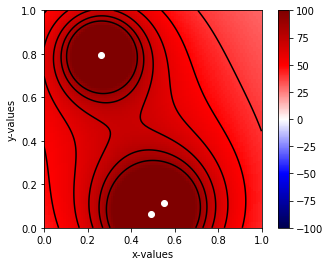

In [18]:
#code for creating a plot for 3 random point charges:

q1 = random.uniform(-2e-9, 2e-9)
q2 = random.uniform(-2e-9, 2e-9)
q3 = random.uniform(-2e-9, 2e-9)
x1 = random.uniform(0, 1)
x2 = random.uniform(0, 1)
x3 = random.uniform(0, 1)
y1 = random.uniform(0, 1)
y2 = random.uniform(0, 1)
y3 = random.uniform(0, 1)

#code for printing values, to check the array

print(f"V_plot({q1:9.2e}, {x1:4.2f}, {y1:4.2f},")
print(f"       {q2:9.2e}, {x2:4.2f}, {y2:4.2f},")
print(f"       {q3:9.2e}, {x3:4.2f}, {y3:4.2f})")

V_plot(q1, x1, y1, q2, x2, y2, q3, x3, y3)


Notice once again, that the voltage at the point charges are zero. This is a good indicator that the rest of the imshow plot is

# To Summarize:


At the end of this project, we now have written code for creating the plots of random point charges, measuring the electric potential at different radii away from each point. The implications for this code in electrodynamics make calculations far easier than they would be by hand. 
